In [1]:
import sys
import time
import scipy
import logging
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [86]:
import numpy as np
import scipy.sparse as sp
import anndata

matrix = np.array([
    [10, 20, 30, 40 , 50],
    [40, 50, 60, 70, 80],
    [70, 80, 90, 100, 110],
    [35, 45, 55, 65 , 75],
    [5, 15, 25, 35, 45],
    [1, 2, 3, 4, 5]
])

# Convert the matrix to a sparse CSR format for use in AnnData
sparse_matrix = sp.csr_matrix(matrix)
adata = anndata.AnnData(X=sparse_matrix)

adata.X.toarray()

array([[ 10,  20,  30,  40,  50],
       [ 40,  50,  60,  70,  80],
       [ 70,  80,  90, 100, 110],
       [ 35,  45,  55,  65,  75],
       [  5,  15,  25,  35,  45],
       [  1,   2,   3,   4,   5]])

In [87]:
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform
print("Applying log transformation")
sc.pp.log1p(adata)

# # High-variable gene selection
# print("Selecting highly variable genes")
# sc.pp.highly_variable_genes(adata_raw, flavor='seurat', n_top_genes=2000)
adata.X.toarray()

Applying log transformation


array([[6.503789 , 7.196187 , 7.6014023, 7.8889594, 8.112028 ],
       [7.196187 , 7.419181 , 7.6014023, 7.7554817, 7.8889594],
       [7.3502307, 7.4836817, 7.6014023, 7.7067127, 7.801982 ],
       [7.149703 , 7.4008427, 7.6014023, 7.7683797, 7.911424 ],
       [5.9939613, 7.09091  , 7.6014023, 7.9377317, 8.188967 ],
       [6.503789 , 7.196187 , 7.6014023, 7.8889594, 8.112028 ]],
      dtype=float32)

In [58]:
adata_downsample = subsample_anndata(adata,0.5,random_state=42,verbose=True)
adata_downsample.X.toarray()

#time start: 0.0s
Downsampled shape of adata: (6, 5)
Downsampled total counts: 656
#time sub-sample counts: 0.0038s



array([[ 3, 15, 14, 20, 23],
       [27, 30, 29, 27, 37],
       [35, 45, 41, 48, 56],
       [17, 19, 31, 32, 38],
       [ 3,  8, 11, 20, 20],
       [ 1,  0,  0,  2,  4]])

In [60]:
sc.pp.normalize_total(adata_downsample, target_sum=1e4)

# Log transform
print("Applying log transformation")
sc.pp.log1p(adata_downsample)

# # High-variable gene selection
# print("Selecting highly variable genes")
# sc.pp.highly_variable_genes(adata_downsample, flavor='seurat', n_top_genes=2000)
adata_downsample.X.toarray()

Applying log transformation


array([[5.9939613, 7.6014023, 7.532445 , 7.8889594, 8.028672 ],
       [7.4960976, 7.6014023, 7.567518 , 7.4960976, 7.8110285],
       [7.3502307, 7.6014023, 7.508361 , 7.66591  , 7.8199935],
       [7.124378 , 7.2355194, 7.7247887, 7.756523 , 7.928306 ],
       [6.1838827, 7.163422 , 7.4816647, 8.079248 , 8.079248 ],
       [7.26513  , 0.       , 0.       , 7.957927 , 8.6509   ]],
      dtype=float32)

In [88]:
sc.pp.neighbors(adata, n_neighbors=4, metric='l2', use_rep='X')
adata.obsp['connectivities'].toarray()

array([[0.0000000e+00, 2.4047035e-01, 1.3577032e-01, 2.9904428e-01,
        1.0000000e+00, 1.0000000e+00],
       [2.4047035e-01, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3577032e-01, 1.0000000e+00, 0.0000000e+00, 9.5939922e-01,
        0.0000000e+00, 0.0000000e+00],
       [2.9904428e-01, 1.0000000e+00, 9.5939922e-01, 0.0000000e+00,
        1.2954429e-10, 5.8175342e-06],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2954429e-10,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.8175342e-06,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [89]:
adata.obsp['distances'].toarray()

array([[0.        , 0.        , 0.        , 0.71684754, 0.52849388,
        0.        ],
       [0.77247477, 0.        , 0.19450785, 0.05628565, 0.        ,
        0.        ],
       [0.96356595, 0.19450785, 0.        , 0.25070712, 0.        ,
        0.        ],
       [0.71684754, 0.05628565, 0.25070712, 0.        , 0.        ,
        0.        ],
       [0.52849388, 0.        , 0.        , 1.23996258, 0.        ,
        0.52849388],
       [0.        , 0.        , 0.        , 0.71684754, 0.52849388,
        0.        ]])

In [78]:
sc.pp.neighbors(adata_downsample, n_neighbors=4, metric='l2', use_rep='X')
adata_downsample.obsp['connectivities'].toarray()

array([[0.        , 0.        , 0.46113244, 0.53886896, 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.92422175, 0.29982132,
        0.        ],
       [0.46113244, 1.        , 0.        , 0.99999994, 0.57870203,
        0.41876322],
       [0.53886896, 0.92422175, 0.99999994, 0.        , 0.6852201 ,
        0.58123785],
       [1.        , 0.29982132, 0.57870203, 0.6852201 , 0.        ,
        1.        ],
       [0.        , 0.        , 0.41876322, 0.58123785, 1.        ,
        0.        ]], dtype=float32)

In [65]:
cal_ranked_order(adata.obsp['connectivities'], adata_downsample.obsp['connectivities'])

[0.24047035 0.13577032 0.29904428 1.         1.        ]
[0.         0.46113244 0.53886896 1.         0.        ]
0.23684210526315794
[0.24047035 1.         1.         0.        ]
[0.         1.         0.92422175 0.29982132]
0.7378647873726218
[0.13577032 1.         0.9593992  0.         0.        ]
[0.46113244 1.         0.99999994 0.57870203 0.41876322]
0.8207826816681234
[2.9904428e-01 1.0000000e+00 9.5939922e-01 1.2954429e-10 5.8175342e-06]
[0.53886896 0.92422175 0.99999994 0.6852201  0.58123785]
0.49999999999999994
[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2954429e-10 1.0000000e+00]
[1.         0.29982132 0.57870203 0.6852201  1.        ]
0.9733285267845754
[1.000000e+00 0.000000e+00 5.817534e-06 1.000000e+00]
[0.         0.41876322 0.58123785 1.        ]
0.10540925533894598


0.5623712260712374

In [106]:
from scipy.stats import spearmanr, pearsonr

def cal_ranked_order(distances_raw, distances_noise):
    # Calculate Spearman's rank correlation for neighbors
    rank_correlation = []
    for i in range(distances_raw.shape[0]):
        raw_indices = distances_raw[i].indices
        noise_indices = distances_noise[i].indices
        all_indices = np.union1d(raw_indices, noise_indices)
        raw_row = distances_raw[i, all_indices].toarray().flatten()
        noise_row = distances_noise[i, all_indices].toarray().flatten()
        raw_row[raw_row == 0] = int(1e9)
        noise_row[noise_row == 0] = int(1e9)

        corr, _ = spearmanr(raw_row, noise_row)
        
        rank_correlation.append(corr)
    return np.nanmean(rank_correlation)

metric = 'l2'
adata_raw = anndata.read_h5ad('/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K.h5ad')
adata_noise = anndata.read_h5ad('/projects/zhanglab/users/johnson/gene_downsampled_data_processed/Cano_filtered_sampled_7K_downsample_0.3.h5ad')
distances_raw = adata_raw.obsp[f'neighbors_{metric}_distances']
distances_noise = adata_noise.obsp[f'neighbors_{metric}_distances']

cal_ranked_order(distances_raw, distances_noise)

-0.38132342184622575

In [101]:
distances_raw[0].indices

array([ 803, 1535, 2019, 2903, 3795, 4939, 5724, 6414, 6474], dtype=int32)

In [100]:
distances_noise[0].indices

array([1535, 1779, 3001, 4483, 4883, 4939, 6367, 6414, 6966], dtype=int32)

In [99]:
distances_noise[0].data

array([0.17686637, 0.20358108, 0.19913092, 0.19783232, 0.2064757 ,
       0.2044905 , 0.20384912, 0.20042785, 0.20078111])

In [31]:
adata_raw.X.toarray()

array([[0.        , 1.1912084 , 1.4368634 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.59409   , 1.1020641 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.2014413 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71196425, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.5525906 , 2.4113364 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [32]:
adata_noise.X.toarray()

array([[0.       , 1.0864942, 1.2860558, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 3.6464157, 1.0018247, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 1.4635868, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.9094163, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 2.422148 , 2.2468274, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [6]:
def subsample_anndata(adata,downsample_rate,random_state=0,verbose=True):
    np.random.seed(random_state)
    adata = adata.copy()
    if verbose: 
        start_time=time.time()
        print('#time start: 0.0s')
    
    # Sub-sample the counts for each cell   
    Nc,G=adata.shape
    Nr = adata.X.sum()/Nc
    Nr_new = Nr * downsample_rate
    Nrc = np.array(adata.X.sum(axis=1)).reshape(-1)
    
    ## change it to np array maybe 
    data_new = []
    indices_new = []
    indptr_new = [0]
    
    for icell, _ in enumerate(adata.obs_names):
        target_Nrc = int(Nrc[icell]*downsample_rate)
        if target_Nrc == 0:
            print(f"Warning: Cell {icell} is reduced to zero counts!")
        if target_Nrc>0:
            ## subsample 
            idx_vec = []
            idx_gene = []
            temp = adata.X[icell].astype(int)
            
            for val,i_gene in zip(temp.data,temp.indices):
                idx_gene.append(i_gene)
                idx_vec.extend([i_gene]*val)
            downsamp = np.random.choice(idx_vec,target_Nrc,replace=False)
            indices,values = np.unique(downsamp,return_counts=True)
            
            ## set row value
            data_new.extend(list(values))
            indices_new.extend(list(indices))
            indptr_new.append(values.shape[0]+indptr_new[-1])
        else:
            indptr_new.append(indptr_new[-1])
        
        if verbose and icell%5000==0 and icell>0:
            print('## %d cells processed'%icell)
    ## construct a new adata file
    X_new = sp.csr_matrix((data_new, indices_new, indptr_new), shape=adata.shape)
    adata.X = X_new
    print(f"Downsampled shape of adata: {adata.shape}")
    print(f"Downsampled total counts: {adata.X.sum()}")
    
    # Ensure no empty dataset
    if adata.shape[0] == 0 or adata.shape[1] == 0:
        print("Warning: Returned AnnData object has zero samples or zero features!")
    
    if verbose: 
        print('#time sub-sample counts: %0.4fs\n'%(time.time()-start_time)) 
    return adata

In [2]:
import os
import anndata
import numpy as np
import scanpy as sc
from sklearn.metrics import pairwise_distances, silhouette_score
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
from typing import Tuple

def downsample(
    adata, 
    downsample_ratio: float, 
    random_state: int = 42, 
    verbose: bool = True
) -> Tuple:
    """
    Downsample the counts for each cell in the AnnData object by a given downsample ratio.
    This function reduces the read depth (gene counts) for each cell without changing the number of cells.
    
    Parameters:
    - adata: AnnData object (with a sparse matrix as `adata.X`).
    - downsample_ratio: The ratio to downsample the gene counts. Must be between 0 and 1.
    - random_state: Seed for reproducibility (default: 42).
    - verbose: Whether to print progress and timing information (default: True).
    
    Returns:
    - adata_downsampled: AnnData object with downsampled counts.
    - zero_count_cells: List of cell IDs (indices) that have zero counts after downsampling.
    """
    if not (0 <= downsample_ratio <= 1):
        raise ValueError("downsample_ratio must be between 0 and 1.")
    
    rng = np.random.default_rng(seed=random_state)
    adata_downsampled = adata.copy()  # Make a copy to avoid changing the original data
    zero_count_cells = []
    
    if verbose:
        start_time = time.time()
        print(f"Start downsampling with ratio {downsample_ratio}")
    
    # Ensure the matrix is in CSR format for efficient row slicing
    if not sp.isspmatrix_csr(adata_downsampled.X):
        X = adata_downsampled.X.tocsr()
    else:
        X = adata_downsampled.X
    
    data_new = []
    indices_new = []
    indptr_new = [0]
    
    for icell in range(X.shape[0]):
        row_start = X.indptr[icell]
        row_end = X.indptr[icell + 1]
        gene_indices = X.indices[row_start:row_end]
        gene_counts = X.data[row_start:row_end]
        total_counts = gene_counts.sum()
        
        target_counts = int(total_counts * downsample_ratio)
        
        if target_counts > 0:
            # Expand gene indices according to their counts
            # To avoid large memory usage, use multinomial sampling
            # Calculate probabilities for each gene
            probabilities = gene_counts / total_counts
            # Sample target_counts from the multinomial distribution
            sampled_counts = rng.multinomial(target_counts, probabilities)
            non_zero = sampled_counts > 0
            sampled_genes = gene_indices[non_zero]
            sampled_gene_counts = sampled_counts[non_zero]
            
            if sampled_gene_counts.size == 0:
                zero_count_cells.append(icell)
            
            data_new.extend(sampled_gene_counts)
            indices_new.extend(sampled_genes)
            indptr_new.append(len(data_new))
        else:
            zero_count_cells.append(icell)
            indptr_new.append(len(data_new))
        
        # Optional progress report
        if verbose and (icell + 1) % 5000 == 0:
            print(f"Processed {icell + 1} cells...")
    
    # Construct the new downsampled sparse matrix
    X_new = sp.csr_matrix((data_new, indices_new, indptr_new), shape=X.shape)
    adata_downsampled.X = X_new
    
    if verbose:
        elapsed_time = time.time() - start_time
        print(f"Downsampling completed in {elapsed_time:.2f} seconds.")
        print(f"Number of cells with zero counts after downsampling: {len(zero_count_cells)}")

    return adata_downsampled

In [5]:
# Load the data
DATA_PATH = '/projects/zhanglab/users/johnson/sampled_data/MouseRetina_filtered_sampled_7K.h5ad'
adata = anndata.read_h5ad(DATA_PATH)

adata_downsampled, downsampled_cell_indices = downsample(adata, downsample_ratio=0.5)

print(adata_downsampled.X[downsampled_cell_indices, :])
print(adata.X[downsampled_cell_indices, :])

Start downsampling with ratio 0.5
Processed 5000 cells...
Downsampling completed in 1.66 seconds.
Number of cells with zero counts after downsampling: 0




In [6]:
import os
import numpy as np
import anndata

# Directory containing the datasets
data_dir = '/projects/zhanglab/users/johnson/sampled_data'

# Get list of files containing '7K' in their names, excluding 'TSfacs'
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad')]

for filename in file_list:
    dataset_path = os.path.join(data_dir, filename)
    adata = anndata.read_h5ad(dataset_path)
    dataset_name = filename.split('_')[0]
    
    # Check if all values in adata.X are integers
    if np.all(np.equal(np.mod(adata.X.toarray(), 1), 0)):  # Check if all values are integers
        print(f"The dataset {dataset_name} has all integer values in adata.X.")
    else:
        print(f"The dataset {dataset_name} does NOT have all integer values in adata.X.")

The dataset MouseRetina does NOT have all integer values in adata.X.
The dataset HumanKidney does NOT have all integer values in adata.X.
The dataset TSdrop has all integer values in adata.X.
The dataset TMSfacs has all integer values in adata.X.
The dataset TSfacs has all integer values in adata.X.
The dataset Nathan has all integer values in adata.X.
The dataset Cano has all integer values in adata.X.
The dataset TMSdrop has all integer values in adata.X.


In [78]:
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad') and f not in ['MouseRetina',  'HumanKidney', 'Nathan']]
file_list

['MouseRetina_filtered_sampled_7K.h5ad',
 'HumanKidney_filtered_sampled_7K.h5ad',
 'TSdrop_filtered_sampled_7K.h5ad',
 'TMSfacs_filtered_sampled_7K.h5ad',
 'TSfacs_filtered_sampled_7K.h5ad',
 'Nathan_filtered_sampled_7K.h5ad',
 'Cano_filtered_sampled_7K.h5ad',
 'TMSdrop_filtered_sampled_7K.h5ad']

In [82]:
import os
import numpy as np
import pandas as pd
import scipy.sparse as sp
import anndata
import scanpy as sc
from sklearn.metrics import pairwise_distances, silhouette_score
import time

# Directory containing the datasets
data_dir = '/projects/zhanglab/users/johnson/cell_subsampled_data'

# Get list of files containing '7K' in their names, excluding 'MouseRetina' and 'HumanKidney'
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad') and 'MouseRetina' not in f and 'HumanKidney' not in f and 'Nathan' not in f]

# Mapping of dataset names to label fields
label_field_mapping = {
    'TMSfacs': 'cell_ontology_class',
    'TMSdrop': 'cell_ontology_class',
    'TSdrop': 'cell_ontology_class',
    'TSfacs': 'cell_ontology_class',
    'Cano': 'cluster.id',
    #'Nathan': 'cluster_name',
}

# Initialize list to store results
results = []

# Downsampling ratios to evaluate
downsample_ratios = [0.7, 0.5, 0.3]

# Function to preprocess data (original or modified)
def preprocess_data(adata, label_field, verbose=True):
    """
    Perform preprocessing steps on the input AnnData object.
    """
    adata = adata.copy()
    sc.pp.filter_cells(adata, min_genes=3)
    sc.pp.filter_genes(adata, min_cells=200)
    adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, subset=True)

    if label_field not in adata.obs:
        raise ValueError(f'Label field "{label_field}" not found in dataset.')

    # Filter for valid labels
    labels = adata.obs[label_field].values
    valid_indices = ~pd.isnull(labels)
    if not np.all(valid_indices):
        adata = adata[valid_indices]
        labels = labels[valid_indices]

    labels = labels.astype(str)
    n_clusters = len(np.unique(labels))
    if n_clusters < 2:
        raise ValueError(f'Dataset has only one cluster.')

    return adata, labels

# Loop through datasets
for filename in file_list:
    dataset_path = os.path.join(data_dir, filename)
    dataset_name = filename.split('_')[0]

    print(f'\nProcessing dataset: {dataset_name}')
    label_field = label_field_mapping.get(dataset_name)

    if label_field is None:
        print(f'Label field for dataset {dataset_name} is not defined in the mapping. Skipping dataset.')
        continue

    try:
        adata_raw = anndata.read_h5ad(dataset_path)
        adata_raw.var_names_make_unique()
    except Exception as e:
        print(f'Error loading dataset {dataset_name}: {e}')
        continue

    # Preprocess original data
    try:
        adata_original, labels_original = preprocess_data(adata_raw, label_field)
    except ValueError as e:
        print(f'Error in preprocessing original data for dataset {dataset_name}: {e}')
        continue

    # Compute distance matrices and silhouette scores for original data
    print(f'Computing distance matrices for original data in dataset {dataset_name}...')
    data_original = adata_original.X.toarray() if sp.issparse(adata_original.X) else adata_original.X
    euclidean_dist_original = pairwise_distances(data_original, metric='euclidean')
    correlation_dist_original = pairwise_distances(data_original, metric='correlation')
    euclidean_sil_score_original = silhouette_score(euclidean_dist_original, labels_original, metric='precomputed')
    correlation_sil_score_original = silhouette_score(correlation_dist_original, labels_original, metric='precomputed')

    # Process modified data for each downsample ratio
    for downsample_ratio in downsample_ratios:
        print(f'Processing downsample ratio: {downsample_ratio}')

        # Downsample the raw data
        try:
            adata_downsampled = subsample_anndata(adata_raw, downsample_ratio, random_state=42, verbose=True)
        except Exception as e:
            print(f'Error during downsampling for dataset {dataset_name} with ratio {downsample_ratio}: {e}')
            continue

        # Preprocess the modified data
        try:
            adata_modified, labels_modified = preprocess_data(adata_downsampled, label_field)
        except ValueError as e:
            print(f'Error in preprocessing modified data for dataset {dataset_name} with ratio {downsample_ratio}: {e}')
            continue

        # Compute distance matrices and silhouette scores for modified data
        print(f'Computing distance matrices for modified data in dataset {dataset_name} with downsample ratio {downsample_ratio}...')
        data_modified = adata_modified.X.toarray() if sp.issparse(adata_modified.X) else adata_modified.X
        euclidean_dist_modified = pairwise_distances(data_modified, metric='euclidean')
        correlation_dist_modified = pairwise_distances(data_modified, metric='correlation')
        euclidean_sil_score_modified = silhouette_score(euclidean_dist_modified, labels_modified, metric='precomputed')
        correlation_sil_score_modified = silhouette_score(correlation_dist_modified, labels_modified, metric='precomputed')

        # Compute the differences
        delta_euclidean_sil_score = euclidean_sil_score_modified - euclidean_sil_score_original
        delta_correlation_sil_score = correlation_sil_score_modified - correlation_sil_score_original

        # Store the results
        results.append({
            'dataset_name': dataset_name,
            'downsample_ratio': downsample_ratio,
            'euclidean_sil_score_original': euclidean_sil_score_original,
            'correlation_sil_score_original': correlation_sil_score_original,
            'euclidean_sil_score_modified': euclidean_sil_score_modified,
            'correlation_sil_score_modified': correlation_sil_score_modified,
            'delta_euclidean_sil_score': delta_euclidean_sil_score,
            'delta_correlation_sil_score': delta_correlation_sil_score
        })

        print(f'Dataset: {dataset_name}, Downsample Ratio: {downsample_ratio}')
        print(f'Euclidean Silhouette Score (Original) = {euclidean_sil_score_original}')
        print(f'Correlation Silhouette Score (Original) = {correlation_sil_score_original}')
        print(f'Euclidean Silhouette Score (Modified) = {euclidean_sil_score_modified}')
        print(f'Correlation Silhouette Score (Modified) = {correlation_sil_score_modified}')
        print(f'Delta Euclidean Silhouette Score = {delta_euclidean_sil_score}')
        print(f'Delta Correlation Silhouette Score = {delta_correlation_sil_score}')


Processing dataset: TSdrop


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for original data in dataset TSdrop...
Processing downsample ratio: 0.7
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 36715)
Downsampled total counts: 59687365
#time sub-sample counts: 8.8232s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TSdrop with downsample ratio 0.7...
Dataset: TSdrop, Downsample Ratio: 0.7
Euclidean Silhouette Score (Original) = 0.05497058108448982
Correlation Silhouette Score (Original) = 0.15205201697069004
Euclidean Silhouette Score (Modified) = 0.041580915451049805
Correlation Silhouette Score (Modified) = 0.14051106191727628
Delta Euclidean Silhouette Score = -0.013389665633440018
Delta Correlation Silhouette Score = -0.011540955053413765
Processing downsample ratio: 0.5
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 36715)
Downsampled total counts: 42634392
#time sub-sample counts: 8.3006s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TSdrop with downsample ratio 0.5...
Dataset: TSdrop, Downsample Ratio: 0.5
Euclidean Silhouette Score (Original) = 0.05497058108448982
Correlation Silhouette Score (Original) = 0.15205201697069004
Euclidean Silhouette Score (Modified) = 0.020340602844953537
Correlation Silhouette Score (Modified) = 0.12999367726173572
Delta Euclidean Silhouette Score = -0.034629978239536285
Delta Correlation Silhouette Score = -0.022058339708954322
Processing downsample ratio: 0.3
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 36715)
Downsampled total counts: 25578525
#time sub-sample counts: 7.5475s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TSdrop with downsample ratio 0.3...
Dataset: TSdrop, Downsample Ratio: 0.3
Euclidean Silhouette Score (Original) = 0.05497058108448982
Correlation Silhouette Score (Original) = 0.15205201697069004
Euclidean Silhouette Score (Modified) = -0.017963532358407974
Correlation Silhouette Score (Modified) = 0.11407698184336525
Delta Euclidean Silhouette Score = -0.0729341134428978
Delta Correlation Silhouette Score = -0.037975035127324794

Processing dataset: TMSfacs


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for original data in dataset TMSfacs...
Processing downsample ratio: 0.7
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 22953)
Downsampled total counts: 5325995461
#time sub-sample counts: 421.8366s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TMSfacs with downsample ratio 0.7...
Dataset: TMSfacs, Downsample Ratio: 0.7
Euclidean Silhouette Score (Original) = 0.07776538282632828
Correlation Silhouette Score (Original) = 0.18611514751371763
Euclidean Silhouette Score (Modified) = 0.07632727175951004
Correlation Silhouette Score (Modified) = 0.18470851351330664
Delta Euclidean Silhouette Score = -0.0014381110668182373
Delta Correlation Silhouette Score = -0.0014066340004109945
Processing downsample ratio: 0.5
#time start: 0.0s
## 5000 cells processed
Dataset: TMSfacs, Downsample Ratio: 0.5
Euclidean Silhouette Score (Original) = 0.07776538282632828
Correlation Silhouette Score (Original) = 0.18611514751371763
Euclidean Silhouette Score (Modified) = 0.07537327706813812
Correlation Silhouette Score (Modified) = 0.1835754594712275
Delta Euclidean Silhouette Score = -0.002392105758190155
Delta Correlation Silhouette Score = -0.0025396880424901347
Processing downsample ratio: 

/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TMSfacs with downsample ratio 0.3...
Dataset: TMSfacs, Downsample Ratio: 0.3
Euclidean Silhouette Score (Original) = 0.07776538282632828
Correlation Silhouette Score (Original) = 0.18611514751371763
Euclidean Silhouette Score (Modified) = 0.07454989105463028
Correlation Silhouette Score (Modified) = 0.18268373332373547
Delta Euclidean Silhouette Score = -0.003215491771697998
Delta Correlation Silhouette Score = -0.0034314141899821626

Processing dataset: TSfacs


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for original data in dataset TSfacs...
Processing downsample ratio: 0.7
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 34963)
Downsampled total counts: 3436437054
#time sub-sample counts: 262.2339s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TSfacs with downsample ratio 0.7...
Dataset: TSfacs, Downsample Ratio: 0.7
Euclidean Silhouette Score (Original) = -0.062422528862953186
Correlation Silhouette Score (Original) = 0.051286422980455486
Euclidean Silhouette Score (Modified) = -0.07080026715993881
Correlation Silhouette Score (Modified) = 0.04725462930089267
Delta Euclidean Silhouette Score = -0.008377738296985626
Delta Correlation Silhouette Score = -0.0040317936795628145
Processing downsample ratio: 0.5
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 34963)
Downsampled total counts: 2454598484
#time sub-sample counts: 245.7424s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TSfacs with downsample ratio 0.5...
Dataset: TSfacs, Downsample Ratio: 0.5
Euclidean Silhouette Score (Original) = -0.062422528862953186
Correlation Silhouette Score (Original) = 0.051286422980455486
Euclidean Silhouette Score (Modified) = -0.07119888067245483
Correlation Silhouette Score (Modified) = 0.04761713277314874
Delta Euclidean Silhouette Score = -0.008776351809501648
Delta Correlation Silhouette Score = -0.003669290207306747
Processing downsample ratio: 0.3
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 34963)
Downsampled total counts: 1472756985
#time sub-sample counts: 228.2041s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TSfacs with downsample ratio 0.3...
Dataset: TSfacs, Downsample Ratio: 0.3
Euclidean Silhouette Score (Original) = -0.062422528862953186
Correlation Silhouette Score (Original) = 0.051286422980455486
Euclidean Silhouette Score (Modified) = -0.07310415804386139
Correlation Silhouette Score (Modified) = 0.04679972909077001
Delta Euclidean Silhouette Score = -0.010681629180908203
Delta Correlation Silhouette Score = -0.004486693889685478

Processing dataset: Cano


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for original data in dataset Cano...
Processing downsample ratio: 0.7
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 20601)
Downsampled total counts: 81914200
#time sub-sample counts: 11.7538s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset Cano with downsample ratio 0.7...
Dataset: Cano, Downsample Ratio: 0.7
Euclidean Silhouette Score (Original) = -0.003307752776890993
Correlation Silhouette Score (Original) = 0.0018496191747207863
Euclidean Silhouette Score (Modified) = -0.006971055641770363
Correlation Silhouette Score (Modified) = 0.0012097025101595951
Delta Euclidean Silhouette Score = -0.0036633028648793697
Delta Correlation Silhouette Score = -0.0006399166645611912
Processing downsample ratio: 0.5
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 20601)
Downsampled total counts: 58510743
#time sub-sample counts: 10.9981s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset Cano with downsample ratio 0.5...
Dataset: Cano, Downsample Ratio: 0.5
Euclidean Silhouette Score (Original) = -0.003307752776890993
Correlation Silhouette Score (Original) = 0.0018496191747207863
Euclidean Silhouette Score (Modified) = -0.010001590475440025
Correlation Silhouette Score (Modified) = -0.001143294451650463
Delta Euclidean Silhouette Score = -0.006693837698549032
Delta Correlation Silhouette Score = -0.002992913626371249
Processing downsample ratio: 0.3
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 20601)
Downsampled total counts: 35104366
#time sub-sample counts: 10.2334s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset Cano with downsample ratio 0.3...
Dataset: Cano, Downsample Ratio: 0.3
Euclidean Silhouette Score (Original) = -0.003307752776890993
Correlation Silhouette Score (Original) = 0.0018496191747207863
Euclidean Silhouette Score (Modified) = -0.012189730070531368
Correlation Silhouette Score (Modified) = -0.004004818988671793
Delta Euclidean Silhouette Score = -0.008881976827979088
Delta Correlation Silhouette Score = -0.005854438163392579

Processing dataset: TMSdrop


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for original data in dataset TMSdrop...
Processing downsample ratio: 0.7
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 20010)
Downsampled total counts: 44774839
#time sub-sample counts: 6.9461s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TMSdrop with downsample ratio 0.7...
Dataset: TMSdrop, Downsample Ratio: 0.7
Euclidean Silhouette Score (Original) = 0.07263491302728653
Correlation Silhouette Score (Original) = 0.12605042517991638
Euclidean Silhouette Score (Modified) = 0.06169423088431358
Correlation Silhouette Score (Modified) = 0.1117357039937397
Delta Euclidean Silhouette Score = -0.010940682142972946
Delta Correlation Silhouette Score = -0.014314721186176688
Processing downsample ratio: 0.5
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 20010)
Downsampled total counts: 31982650
#time sub-sample counts: 6.5205s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TMSdrop with downsample ratio 0.5...
Dataset: TMSdrop, Downsample Ratio: 0.5
Euclidean Silhouette Score (Original) = 0.07263491302728653
Correlation Silhouette Score (Original) = 0.12605042517991638
Euclidean Silhouette Score (Modified) = 0.0519857220351696
Correlation Silhouette Score (Modified) = 0.09776024826192298
Delta Euclidean Silhouette Score = -0.020649190992116928
Delta Correlation Silhouette Score = -0.028290176917993404
Processing downsample ratio: 0.3
#time start: 0.0s
## 5000 cells processed
Downsampled shape of adata: (7000, 20010)
Downsampled total counts: 19187501
#time sub-sample counts: 6.0564s



/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Computing distance matrices for modified data in dataset TMSdrop with downsample ratio 0.3...
Dataset: TMSdrop, Downsample Ratio: 0.3
Euclidean Silhouette Score (Original) = 0.07263491302728653
Correlation Silhouette Score (Original) = 0.12605042517991638
Euclidean Silhouette Score (Modified) = 0.03712679445743561
Correlation Silhouette Score (Modified) = 0.08035355814585005
Delta Euclidean Silhouette Score = -0.03550811856985092
Delta Correlation Silhouette Score = -0.045696867034066335


In [4]:
# Check if downsampling has affected the values in downsampled cells
print("Original values in selected cells:")
print(adata.X[downsampled_cell_indices[:5], :].toarray() if sp.issparse(adata.X) else adata.X[downsampled_cell_indices[:5], :])

print("Modified values in selected cells:")
print(adata_modified.X[downsampled_cell_indices[:5], :].toarray() if sp.issparse(adata_modified.X) else adata_modified.X[downsampled_cell_indices[:5], :])

Original values in selected cells:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.500938   0.89103365 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.9208391  2.251596   ... 0.         0.         0.        ]]
Modified values in selected cells:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.500938   0.89103365 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.9208391  2.251596   ... 0.         0.         0.        ]]


In [5]:
downsampled_cell_indices

array([4543, 1539, 6747, ..., 6018, 1883, 4849])

In [9]:
adata.X[downsampled_cell_indices[:5], :].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.500938  , 0.89103365,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.9208391 , 2.251596  , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [83]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('different_scale_delta_silhouette_scores_2.csv', index=False)
print('\nResults saved to different_scale_delta_silhouette_scores.csv')


Results saved to different_scale_delta_silhouette_scores.csv


In [84]:
results_df

,dataset_name,downsample_ratio,euclidean_sil_score_original,correlation_sil_score_original,euclidean_sil_score_modified,correlation_sil_score_modified,delta_euclidean_sil_score,delta_correlation_sil_score
0,TSdrop,0.7,0.054971,0.152052,0.041581,0.140511,-0.013390,-0.011541
1,TSdrop,0.5,0.054971,0.152052,0.020341,0.129994,-0.034630,-0.022058
2,TSdrop,0.3,0.054971,0.152052,-0.017964,0.114077,-0.072934,-0.037975
3,TMSfacs,0.7,0.077765,0.186115,0.076327,0.184709,-0.001438,-0.001407
4,TMSfacs,0.5,0.077765,0.186115,0.075373,0.183575,-0.002392,-0.002540
5,TMSfacs,0.3,0.077765,0.186115,0.074550,0.182684,-0.003215,-0.003431
6,TSfacs,0.7,-0.062423,0.051286,-0.070800,0.047255,-0.008378,-0.004032
7,TSfacs,0.5,-0.062423,0.051286,-0.071199,0.047617,-0.008776,-0.003669
8,TSfacs,0.3,-0.062423,0.051286,-0.073104,0.046800,-0.010682,-0.004487
9,Cano,0.7,-0.003308,0.001850,-0.006971,0.001210,-0.003663,-0.000640


In [25]:
# Load the data
DATA_PATH = '/projects/zhanglab/users/johnson/sampled_data/Cano_filtered_sampled_7K.h5ad'
adata = anndata.read_h5ad(DATA_PATH)
adata

AnnData object with n_obs × n_vars = 7000 × 20601
    obs: 'cell.type', 'cytokine.condition', 'donor.id', 'batch.10X', 'nGene', 'nUMI', 'percent.mito', 'S.Score', 'G2M.Score', 'Phase', 'cluster.id', 'effectorness', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [26]:
adata.X[:10, :10].toarray() 

array([[0., 0., 2., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 3., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
# Directory containing the datasets
data_dir = '/projects/zhanglab/users/johnson/sampled_data'

# Get list of files containing '7K' in their names, excluding 'TSfacs'
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad')]

# Define the mapping from dataset names to label fields
label_field_mapping = {
    'TMSfacs': 'cell_ontology_class',
    'TMSdrop': 'cell_ontology_class',
    'TSdrop': 'cell_ontology_class',
    'Cano': 'cluster.id',
    'MouseRetina': 'cell_type',
    'Nathan': 'cluster_name',
    'HumanKidney': 'cell_type',
}

# Initialize lists to store results
results = []
delta_sil_scores_euclidean = []
delta_sil_scores_correlation = []

for filename in file_list:
    dataset_path = os.path.join(data_dir, filename)
    dataset_name = filename.split('_')[0]
    
    print(f'\nProcessing dataset: {dataset_name}')
    label_field = label_field_mapping.get(dataset_name)
    
    adata = anndata.read_h5ad(dataset_path)
    print(adata.X[:10, :10])


Processing dataset: MouseRetina
  (0, 2)	0.46751606
  (0, 6)	0.46751606
  (0, 8)	0.46751606
  (3, 6)	0.51343775
  (3, 8)	0.51343775
  (4, 2)	0.531137
  (4, 8)	0.87618935
  (5, 2)	0.9923766
  (5, 4)	0.82120115
  (5, 8)	0.6145471
  (6, 2)	0.66863745
  (6, 8)	0.66863745
  (8, 2)	0.3536479
  (8, 8)	0.3536479
  (9, 2)	0.5467925
  (9, 8)	0.5467925

Processing dataset: HumanKidney
  (2, 3)	2.129766
  (5, 3)	1.2086834
  (6, 3)	1.9406146

Processing dataset: TSdrop
  (6, 8)	1.0
  (7, 3)	1.0

Processing dataset: TMSfacs
  (0, 1)	680.0
  (0, 2)	149.0
  (0, 4)	60.0
  (0, 5)	200.0
  (1, 1)	135.0
  (1, 2)	77.0
  (1, 5)	17.0
  (2, 6)	25.0
  (3, 1)	72.0
  (3, 9)	68.0
  (4, 1)	25.0
  (4, 2)	11.0
  (5, 1)	1561.0
  (5, 2)	14.0
  (5, 4)	15.0
  (5, 5)	338.0
  (5, 9)	183.0
  (6, 1)	242.0
  (7, 1)	225.0
  (7, 4)	137.0
  (7, 9)	23.0
  (8, 0)	305.0
  (8, 1)	112.0
  (8, 5)	211.0
  (9, 6)	189.0

Processing dataset: TSfacs
  (5, 9)	1.0
  (7, 3)	17.0
  (7, 4)	9.0

Processing dataset: Nathan
  (4, 5)	1.0
  (1, 5)	

   downsample_ratio               Metric      Mean       SEM        CI  Count
0               0.3       Euclidean (L2) -0.026244  0.012922  0.035878      5
1               0.3  Pearson Correlation -0.019489  0.009212  0.025578      5
2               0.5       Euclidean (L2) -0.014628  0.005845  0.016228      5
3               0.5  Pearson Correlation -0.011910  0.005507  0.015290      5
4               0.7       Euclidean (L2) -0.007562  0.002222  0.006169      5
5               0.7  Pearson Correlation -0.006387  0.002764  0.007674      5
Paired t-test for downsample_ratio 0.7: t-statistic = 0.8768, p-value = 2.1506e-01
Paired t-test for downsample_ratio 0.5: t-statistic = 0.8209, p-value = 2.2890e-01
Paired t-test for downsample_ratio 0.3: t-statistic = 0.8927, p-value = 2.1124e-01
FDR-corrected p-values: [0.22890414 0.22890414 0.22890414]


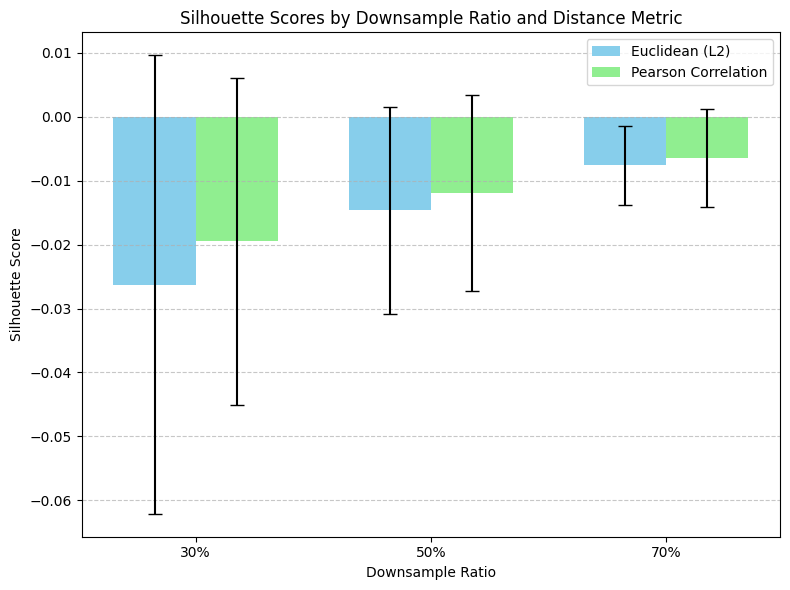

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection

# Read the delta silhouette scores from the CSV file
df = pd.read_csv('different_scale_delta_silhouette_scores_2.csv')

# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=['dataset_name', 'downsample_ratio'], 
                    value_vars=['delta_euclidean_sil_score', 'delta_correlation_sil_score'],
                    var_name='Metric', value_name='Delta Silhouette Score')

# Replace metric names for better readability
df_melted['Metric'] = df_melted['Metric'].replace({
    'delta_euclidean_sil_score': 'Euclidean (L2)',
    'delta_correlation_sil_score': 'Pearson Correlation'
})

# Calculate mean and confidence intervals grouped by downsample_ratio and Metric
grouped = df_melted.groupby(['downsample_ratio', 'Metric'])['Delta Silhouette Score']
means = grouped.mean()
stds = grouped.std()
counts = grouped.count()
sems = stds / np.sqrt(counts)
confidence = 0.95
h = sems * stats.t.ppf((1 + confidence) / 2., counts - 1)

stats_df = pd.DataFrame({
    'Mean': means,
    'SEM': sems,
    'CI': h,
    'Count': counts
}).reset_index()

print(stats_df)

# Perform paired t-test for each downsample_ratio
p_values = []
for ratio in df['downsample_ratio'].unique():
    subset = df[df['downsample_ratio'] == ratio]
    euclidean_scores = subset['delta_euclidean_sil_score']
    correlation_scores = subset['delta_correlation_sil_score']
    t_stat, p_value = ttest_rel(correlation_scores, euclidean_scores, alternative='greater')
    p_values.append((ratio, p_value))
    print(f'Paired t-test for downsample_ratio {ratio}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}')

# FDR correction for p-values
p_value_list = [p[1] for p in p_values]
_, corrected_p_values = fdrcorrection(p_value_list, alpha=0.05)
print('FDR-corrected p-values:', corrected_p_values)

# Combine p-values with ratios
p_values_df = pd.DataFrame({
    'downsample_ratio': [p[0] for p in p_values],
    'p_value': p_value_list,
    'corrected_p_value': corrected_p_values
})

# Plotting
ratios = sorted(df['downsample_ratio'].unique())
ratio_labels = [f"{int(ratio*100)}%" for ratio in ratios]

n_metrics = 2
bar_width = 0.35
x = np.arange(len(ratios))

# Pivot stats_df for plotting
pivot_df = stats_df.pivot(index='downsample_ratio', columns='Metric', values=['Mean', 'CI'])

# Prepare data for plotting
euclidean_means = pivot_df['Mean']['Euclidean (L2)'].values
euclidean_CIs = pivot_df['CI']['Euclidean (L2)'].values

pearson_means = pivot_df['Mean']['Pearson Correlation'].values
pearson_CIs = pivot_df['CI']['Pearson Correlation'].values

plt.figure(figsize=(8, 6))

# Plot Euclidean bars
plt.bar(x - bar_width/2, euclidean_means, yerr=euclidean_CIs, 
        width=bar_width, label='Euclidean (L2)', capsize=5, color='skyblue')

# Plot Pearson bars
plt.bar(x + bar_width/2, pearson_means, yerr=pearson_CIs, 
        width=bar_width, label='Pearson Correlation', capsize=5, color='lightgreen')

# Set x-axis labels
plt.xticks(x, ratio_labels)

# Add labels and title
plt.xlabel('Downsample Ratio')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores by Downsample Ratio and Distance Metric')

# Add legend
plt.legend(loc = 'upper right')

# Add y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add significance annotations
# for i, ratio in enumerate(ratios):
#     corrected_p_value = p_values_df.loc[p_values_df['downsample_ratio'] == ratio, 'corrected_p_value'].values[0]
#     # Get the maximum height of the bars at this x position
#     y_max = max(euclidean_means[i] + euclidean_CIs[i], pearson_means[i] + pearson_CIs[i])
#     y, h, col = y_max - 0.12, 0.01, 'black'
#     x1, x2 = x[i] - bar_width/2, x[i] + bar_width/2
#     # Add '*' if significant, else 'ns'
#     if corrected_p_value < 0.05:
#         plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.0, c=col)
#         plt.text(x[i], y + h + 0.005, '*', ha='center', va='bottom', color=col, fontsize=14)
#     else:
#         plt.text(x[i], y + h, 'ns', ha='center', va='bottom', color=col, fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import scanpy as sc
from scipy import sparse


def calculate_pearson_residuals(adata):
    """
    Approximate Pearson residuals for each gene in the single-cell data.
    This method estimates a mean-variance relationship and applies a residual calculation.

    Parameters:
    - adata (AnnData): Single-cell data object with normalized counts.

    Returns:
    - AnnData: Transformed data with Pearson residuals.
    """
    # Convert to dense array if sparse
    if sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    
    # Calculate mean and variance per gene
    mu = np.mean(adata.X, axis=0)  # Mean of each gene across all cells
    var = np.var(adata.X, axis=0)  # Variance of each gene across all cells
    
    # Avoid division by zero in case of zero variance
    var[var == 0] = 1e-6
    
    # Calculate Pearson residuals
    adata.X = (adata.X - mu) / np.sqrt(var)
    return adata

def preprocess_data(adata, method='log'):
    """
    Apply specified transformation to single-cell RNA-seq data and perform 
    QC, normalization, and HVG selection.

    Parameters:
    - adata (AnnData): The single-cell data object.
    - method (str): The transformation method ('log', 'acosh', 'pearson', 'sanity').

    Returns:
    - AnnData: Transformed and preprocessed data.
    """
    # Quality control and filtering
    sc.pp.filter_cells(adata, min_genes=3)
    sc.pp.filter_genes(adata, min_cells=200)
    adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)
    
    # Normalize total counts per cell
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    # Convert to dense format if needed
    if sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    
    # Choose transformation
    if method == 'log':
        # Shifted Logarithm transformation
        sc.pp.log1p(adata)
    
    elif method == 'acosh':
        # Acosh transformation with size factor normalization
        alpha = 0.05  # Example overdispersion parameter
        adata.X = (1 / np.sqrt(alpha)) * np.arccosh(2 * alpha * adata.X / np.max(adata.X) + 1)
    
    elif method == 'pearson':
        # Pearson residual approximation
        adata = calculate_pearson_residuals(adata)
    
    elif method == 'sanity':
        # Sanity MAP transformation placeholder
        print("Sanity MAP transformation is computationally intensive and needs separate setup.")
    
    # Select highly variable genes (HVG)
    sc.pp.highly_variable_genes(adata, subset=True)
    
    return adata

def apply_transformations_and_compare(adata):
    """
    Apply all four transformations to the original data and return results 
    for comparison.

    Parameters:
    - adata (AnnData): Original single-cell data.

    Returns:
    - dict: A dictionary with transformed AnnData objects for each method.
    """
    results = {}
    
    for method in ['log', 'acosh', 'pearson', 'sanity']:
        adata_copy = adata.copy()  # Work with a copy to preserve the original
        print(f"Applying {method} transformation...")
        results[method] = preprocess_data(adata_copy, method)
    
    return results

DATA_PATH = '/projects/zhanglab/users/johnson/sampled_data/MouseRetina_filtered_sampled_7K.h5ad'
adata = anndata.read_h5ad(DATA_PATH)
# Apply and compare transformations
results = apply_transformations_and_compare(adata)

# Example: Inspect transformed data
for method, data in results.items():
    print(f"{method} transformation:")
    print(data.X)  # Check the transformed data matrix

Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


Applying sanity transformation...
Sanity MAP transformation is computationally intensive and needs separate setup.


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


log transformation:
[[0.        0.        1.1164436 ... 2.843639  2.8942323 2.9655056]
 [0.        0.        0.        ... 3.2901728 2.9032052 3.265768 ]
 [0.        0.        0.        ... 3.3033538 2.8862257 3.16713  ]
 ...
 [0.        0.        0.        ... 3.0458088 3.0702617 3.14538  ]
 [0.        0.        0.        ... 3.0159252 3.0380683 3.1225622]
 [0.        0.        0.        ... 2.4443054 2.356441  2.6457536]]
acosh transformation:
[[0.         0.         0.         ... 0.8787389  0.91233826 0.78324276]
 [0.         0.         0.         ... 0.88290733 1.0668889  0.88290733]
 [0.         0.         0.         ... 0.87503505 1.0136906  0.        ]
 ...
 [0.         0.         0.         ... 0.9637981  1.0022898  0.81644744]
 [0.         0.         0.         ... 0.9477137  0.9904523  0.8433522 ]
 [0.         0.         0.         ... 0.657859   0.76992416 0.6416757 ]]
pearson transformation:
[[ 0.5550726   0.15550803 -0.5279621  ...  0.11001143 -0.466408
  -0.54409885]
 [-

In [19]:
import os
import anndata
import numpy as np
import scanpy as sc
from sklearn.metrics import pairwise_distances, silhouette_score
import pandas as pd
from scipy import sparse

# Directory containing the datasets
data_dir = '/projects/zhanglab/users/johnson/sampled_data'

# Get list of files containing '7K' in their names
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad')]

# Define the mapping from dataset names to label fields
label_field_mapping = {
    'TMSfacs': 'cell_ontology_class',
    'TMSdrop': 'cell_ontology_class',
    'TSfacs': 'cell_ontology_class',
    'TSdrop': 'cell_ontology_class',
    'Cano': 'cluster.id',
    'MouseRetina': 'cell_type',
    'Nathan': 'cluster_name',
    'HumanKidney': 'cell_type',
    # Add more mappings as needed
}

# Function to calculate Pearson residuals
def calculate_pearson_residuals(adata):
    if sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    mu = np.mean(adata.X, axis=0)
    var = np.var(adata.X, axis=0)
    var[var == 0] = 1e-6
    adata.X = (adata.X - mu) / np.sqrt(var)
    return adata

# Function to preprocess with transformations
def preprocess_with_transformation(adata, method):
    sc.pp.normalize_total(adata, target_sum=1e4)
    # Convert to dense if sparse
    if sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
        
    if method == 'log':
        sc.pp.log1p(adata)
    elif method == 'acosh':
        alpha = 0.05
        adata.X = (1 / np.sqrt(alpha)) * np.arccosh(2 * alpha * adata.X / np.max(adata.X) + 1)
    elif method == 'pearson':
        adata = calculate_pearson_residuals(adata)
    
    sc.pp.highly_variable_genes(adata, subset=True)
    
    # Convert back to sparse if desired
    adata.X = sparse.csr_matrix(adata.X)  # Optional: Convert back to sparse
    return adata

# Initialize a list to store results
results = []

for filename in file_list:
    dataset_path = os.path.join(data_dir, filename)
    dataset_name = filename.split('_')[0]
    
    print(f'\nProcessing dataset: {dataset_name}')
    
    # Get the label field for this dataset
    label_field = label_field_mapping.get(dataset_name)
    
    if label_field is None:
        print(f'Label field for dataset {dataset_name} is not defined in the mapping. Skipping dataset.')
        continue
    
    try:
        adata = anndata.read_h5ad(dataset_path)
    except Exception as e:
        print(f'Error loading dataset {dataset_name}: {e}')
        continue
    
    if label_field not in adata.obs:
        print(f'Label field "{label_field}" not found in dataset {dataset_name}. Skipping dataset.')
        continue
    
    # Preprocess for each transformation
    transformations = ['log', 'acosh', 'pearson']
    
    for method in transformations:
        print(f'Applying {method} transformation...')
        
        # Make a copy to preserve the original data
        adata_copy = adata.copy()
        
        # Quality control
        adata_copy.var_names_make_unique()
        sc.pp.filter_cells(adata_copy, min_genes=3)
        sc.pp.filter_genes(adata_copy, min_cells=200)
        adata_copy.var['mt'] = adata_copy.var_names.str.startswith('MT-')
        sc.pp.calculate_qc_metrics(adata_copy, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
        
        # Apply transformation
        adata_copy = preprocess_with_transformation(adata_copy, method)
        
        # Extract labels and remove cells with missing labels
        labels = adata_copy.obs[label_field].values
        valid_indices = ~pd.isnull(labels)
        if not np.all(valid_indices):
            adata_copy = adata_copy[valid_indices]
            labels = labels[valid_indices]
        labels = labels.astype(str)
        
        n_clusters = len(np.unique(labels))
        if n_clusters < 2:
            print(f'Dataset {dataset_name} has only one cluster ({n_clusters} cluster). Skipping silhouette score calculation for this transformation.')
            continue
        
        # Extract data matrix
        data = adata_copy.X.toarray() if sparse.issparse(adata_copy.X) else adata_copy.X
        
        # Compute distance matrices
        try:
            euclidean_dist = pairwise_distances(data, metric='euclidean')
            correlation_dist = pairwise_distances(data, metric='correlation')
        except MemoryError as e:
            print(f'MemoryError while computing distance matrices for dataset {dataset_name} with transformation {method}: {e}')
            continue
        except Exception as e:
            print(f'Error computing distance matrices for dataset {dataset_name} with transformation {method}: {e}')
            continue
        
        # Compute silhouette scores
        try:
            euclidean_sil_score = silhouette_score(euclidean_dist, labels, metric='precomputed')
            correlation_sil_score = silhouette_score(correlation_dist, labels, metric='precomputed')
        except Exception as e:
            print(f'Error computing silhouette scores for dataset {dataset_name} with transformation {method}: {e}')
            continue
        
        # Store the results
        results.append({
            'dataset_name': dataset_name,
            'transformation_method': method,
            'euclidean_sil_score': euclidean_sil_score,
            'correlation_sil_score': correlation_sil_score
        })
        
        print(f'Dataset: {dataset_name}, Transformation: {method}, Euclidean Silhouette Score={euclidean_sil_score:.4f}, Correlation Silhouette Score={correlation_sil_score:.4f}')

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('silhouette_scores_transformed.csv', index=False)
print('\nResults saved to silhouette_scores_transformed.csv')


Processing dataset: MouseRetina
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: MouseRetina, Transformation: log, Euclidean Silhouette Score=0.0626, Correlation Silhouette Score=0.1381
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: MouseRetina, Transformation: acosh, Euclidean Silhouette Score=0.0826, Correlation Silhouette Score=0.1711
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


Dataset: MouseRetina, Transformation: pearson, Euclidean Silhouette Score=-0.0270, Correlation Silhouette Score=0.0777

Processing dataset: HumanKidney
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: HumanKidney, Transformation: log, Euclidean Silhouette Score=-0.0089, Correlation Silhouette Score=0.0505
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: HumanKidney, Transformation: acosh, Euclidean Silhouette Score=-0.0086, Correlation Silhouette Score=0.0548
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: HumanKidney, Transformation: pearson, Euclidean Silhouette Score=-0.0695, Correlation Silhouette Score=0.0233

Processing dataset: TSdrop
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TSdrop, Transformation: log, Euclidean Silhouette Score=0.0550, Correlation Silhouette Score=0.1521
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TSdrop, Transformation: acosh, Euclidean Silhouette Score=0.0866, Correlation Silhouette Score=0.1480
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


Dataset: TSdrop, Transformation: pearson, Euclidean Silhouette Score=-0.1012, Correlation Silhouette Score=0.0177

Processing dataset: TMSfacs
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TMSfacs, Transformation: log, Euclidean Silhouette Score=0.0778, Correlation Silhouette Score=0.1861
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TMSfacs, Transformation: acosh, Euclidean Silhouette Score=0.1426, Correlation Silhouette Score=0.2060
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str i

Error computing distance matrices for dataset TMSfacs with transformation pearson: Found array with 0 feature(s) (shape=(7000, 0)) while a minimum of 1 is required by check_pairwise_arrays.

Processing dataset: TSfacs
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TSfacs, Transformation: log, Euclidean Silhouette Score=-0.0624, Correlation Silhouette Score=0.0513
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TSfacs, Transformation: acosh, Euclidean Silhouette Score=0.0385, Correlation Silhouette Score=0.0517
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str i

Error computing distance matrices for dataset TSfacs with transformation pearson: Found array with 0 feature(s) (shape=(7000, 0)) while a minimum of 1 is required by check_pairwise_arrays.

Processing dataset: Nathan
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: Nathan, Transformation: log, Euclidean Silhouette Score=-0.0352, Correlation Silhouette Score=-0.0096
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: Nathan, Transformation: acosh, Euclidean Silhouette Score=-0.0629, Correlation Silhouette Score=-0.0933
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


Dataset: Nathan, Transformation: pearson, Euclidean Silhouette Score=-0.0581, Correlation Silhouette Score=-0.0051

Processing dataset: Cano
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: Cano, Transformation: log, Euclidean Silhouette Score=-0.0033, Correlation Silhouette Score=0.0018
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: Cano, Transformation: acosh, Euclidean Silhouette Score=-0.0077, Correlation Silhouette Score=-0.0147
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


Dataset: Cano, Transformation: pearson, Euclidean Silhouette Score=-0.0419, Correlation Silhouette Score=-0.0054

Processing dataset: TMSdrop
Applying log transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TMSdrop, Transformation: log, Euclidean Silhouette Score=0.0726, Correlation Silhouette Score=0.1261
Applying acosh transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


Dataset: TMSdrop, Transformation: acosh, Euclidean Silhouette Score=0.1058, Correlation Silhouette Score=0.1901
Applying pearson transformation...


/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/yenhsian/miniconda3/envs/lab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:241: RuntimeWarning: invalid value encountered in divide
  df['dispersions_norm'] = (


Dataset: TMSdrop, Transformation: pearson, Euclidean Silhouette Score=-0.0827, Correlation Silhouette Score=0.0132

Results saved to silhouette_scores_transformed.csv


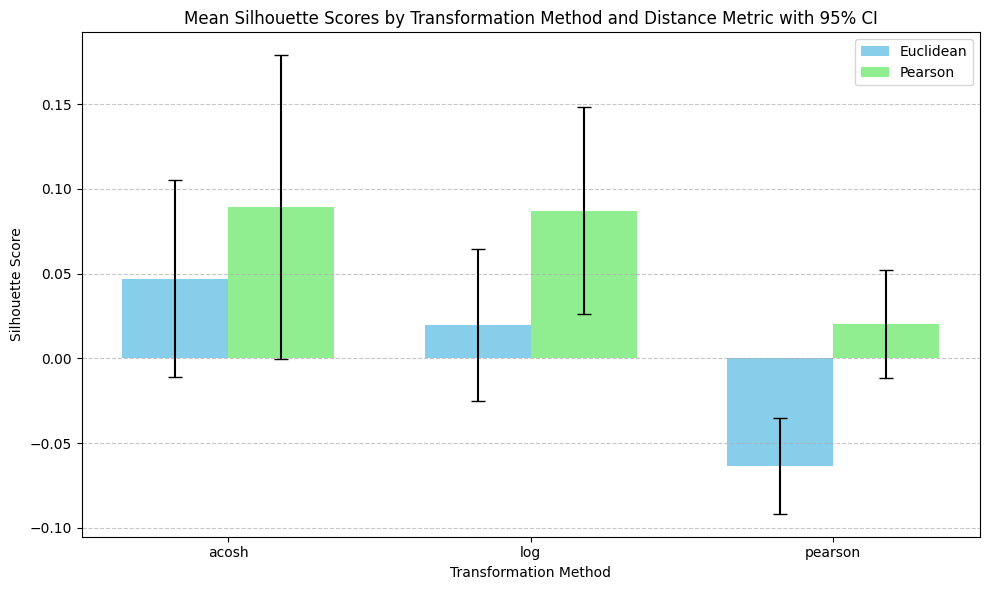

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the silhouette scores data
df = pd.read_csv('silhouette_scores_transformed.csv')

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df, id_vars=['dataset_name', 'transformation_method'],
                    value_vars=['euclidean_sil_score', 'correlation_sil_score'],
                    var_name='Metric', value_name='Silhouette Score')

# Rename metric values for readability
df_melted['Metric'] = df_melted['Metric'].replace({
    'euclidean_sil_score': 'Euclidean',
    'correlation_sil_score': 'Pearson'
})

# Calculate mean and confidence intervals for each transformation and metric
grouped = df_melted.groupby(['transformation_method', 'Metric'])['Silhouette Score']
means = grouped.mean()
stds = grouped.std()
counts = grouped.count()
sems = stds / np.sqrt(counts)
confidence = 0.95
h = sems * stats.t.ppf((1 + confidence) / 2., counts - 1)

# Prepare DataFrame for plotting
stats_df = pd.DataFrame({
    'Mean': means,
    'SEM': sems,
    'CI': h,
    'Count': counts
}).reset_index()

# Pivot the stats DataFrame for easier plotting with error bars
pivot_df = stats_df.pivot(index='transformation_method', columns='Metric', values=['Mean', 'CI'])

# Prepare data for plotting
transformation_methods = pivot_df.index
euclidean_means = pivot_df['Mean']['Euclidean'].values
euclidean_CIs = pivot_df['CI']['Euclidean'].values

pearson_means = pivot_df['Mean']['Pearson'].values
pearson_CIs = pivot_df['CI']['Pearson'].values

# Plotting
bar_width = 0.35
x = np.arange(len(transformation_methods))

plt.figure(figsize=(10, 6))

# Plot Euclidean bars
plt.bar(x - bar_width/2, euclidean_means, yerr=euclidean_CIs, 
        width=bar_width, label='Euclidean', capsize=5, color='skyblue')

# Plot Pearson bars
plt.bar(x + bar_width/2, pearson_means, yerr=pearson_CIs, 
        width=bar_width, label='Pearson', capsize=5, color='lightgreen')

# Set x-axis labels
plt.xticks(x, transformation_methods)

# Add labels and title
plt.xlabel('Transformation Method')
plt.ylabel('Silhouette Score')
plt.title('Mean Silhouette Scores by Transformation Method and Distance Metric with 95% CI')

# Add legend
plt.legend()

# Add y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [2]:
import os
import anndata
import numpy as np
import scanpy as sc
from sklearn.metrics import pairwise_distances, silhouette_score
import pandas as pd
from scipy import sparse

# Directory containing the datasets
data_dir = '/projects/zhanglab/users/johnson/sampled_data'

# Get list of files containing '7K' in their names
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad')]

# Define the mapping from dataset names to label fields
label_field_mapping = {
    'TMSfacs': 'cell_ontology_class',
    'TMSdrop': 'cell_ontology_class',
    'TSfacs': 'cell_ontology_class',
    'TSdrop': 'cell_ontology_class',
    'Cano': 'cluster.id',
    'MouseRetina': 'cell_type',
    'Nathan': 'cluster_name',
    'HumanKidney': 'cell_type',
    # Add more mappings as needed
}

# Function to preprocess with transformations
def preprocess_with_transformation(adata, method):
    sc.pp.normalize_total(adata, target_sum=1e4)
    
    if method == 'log':
        sc.pp.log1p(adata)
    elif method == 'pearson':
        sc.experimental.pp.normalize_pearson_residuals(adata)
    elif method == 'glmpca':
        # Implement GLM PCA
        try:
            from glmpca.glmpca import glmpca
        except ImportError:
            raise ImportError("The 'glmpca' package is required for GLM PCA. Please install it via 'pip install glmpca'.")
    
        counts = adata.X.copy()
        if sparse.issparse(counts):
            counts = counts.toarray()
    
        n_components = 50  # Adjust as needed
        res = glmpca(counts, n_components, fam='poi')
        adata.obsm['X_pca'] = res['factors']
        adata.X = res['factors']
    else:
        raise ValueError(f"Unknown method: {method}")
    
    # Highly variable genes selection with additional check
    # sc.pp.highly_variable_genes(adata, subset=True)
    
    adata.X = sparse.csr_matrix(adata.X)
    return adata

# Initialize a list to store results
results = []

for filename in file_list:
    dataset_path = os.path.join(data_dir, filename)
    dataset_name = filename.split('_')[0]
    
    print(f'\nProcessing dataset: {dataset_name}')
    
    # Get the label field for this dataset
    label_field = label_field_mapping.get(dataset_name)
    
    if label_field is None:
        print(f'Label field for dataset {dataset_name} is not defined in the mapping. Skipping dataset.')
        continue
    
    try:
        adata = anndata.read_h5ad(dataset_path)
    except Exception as e:
        print(f'Error loading dataset {dataset_name}: {e}')
        continue
    
    if label_field not in adata.obs:
        print(f'Label field "{label_field}" not found in dataset {dataset_name}. Skipping dataset.')
        continue
    
    # Preprocess for each transformation
    transformations = ['glmpca']
    
    for method in transformations:
        print(f'Applying {method} transformation...')
        
        # Make a copy to preserve the original data
        adata_copy = adata.copy()
        
        # Quality control
        adata_copy.var_names_make_unique()
        sc.pp.filter_cells(adata_copy, min_genes=3)
        sc.pp.filter_genes(adata_copy, min_cells=200)
        adata_copy.var['mt'] = adata_copy.var_names.str.startswith('MT-')
        sc.pp.calculate_qc_metrics(adata_copy, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
        
        # Apply transformation
        adata_copy = preprocess_with_transformation(adata_copy, method)
        
        # Extract labels and remove cells with missing labels
        labels = adata_copy.obs[label_field].values
        valid_indices = ~pd.isnull(labels)
        if not np.all(valid_indices):
            adata_copy = adata_copy[valid_indices]
            labels = labels[valid_indices]
        labels = labels.astype(str)
        
        n_clusters = len(np.unique(labels))
        if n_clusters < 2:
            print(f'Dataset {dataset_name} has only one cluster ({n_clusters} cluster). Skipping silhouette score calculation for this transformation.')
            continue
        
        # Extract data matrix
        if method == 'glmpca':
            data = adata_copy.obsm['X_pca']
        else:
            data = adata_copy.X.toarray() if sparse.issparse(adata_copy.X) else adata_copy.X
        
        # Compute distance matrices
        try:
            euclidean_dist = pairwise_distances(data, metric='euclidean')
            correlation_dist = pairwise_distances(data, metric='correlation')
        except MemoryError as e:
            print(f'MemoryError while computing distance matrices for dataset {dataset_name} with transformation {method}: {e}')
            continue
        except Exception as e:
            print(f'Error computing distance matrices for dataset {dataset_name} with transformation {method}: {e}')
            continue
        
        # Compute silhouette scores
        try:
            euclidean_sil_score = silhouette_score(euclidean_dist, labels, metric='precomputed')
            correlation_sil_score = silhouette_score(correlation_dist, labels, metric='precomputed')
        except Exception as e:
            print(f'Error computing silhouette scores for dataset {dataset_name} with transformation {method}: {e}')
            continue
        
        # Store the results
        results.append({
            'dataset_name': dataset_name,
            'transformation_method': method,
            'euclidean_sil_score': euclidean_sil_score,
            'correlation_sil_score': correlation_sil_score
        })
        
        print(f'Dataset: {dataset_name}, Transformation: {method}, Euclidean Silhouette Score={euclidean_sil_score:.4f}, Correlation Silhouette Score={correlation_sil_score:.4f}')

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('silhouette_scores_transformed_new.csv', index=False)
print('\nResults saved to silhouette_scores_transformed_new.csv')


Processing dataset: MouseRetina
Applying glmpca transformation...


KeyboardInterrupt: 

In [3]:
file_list = [f for f in os.listdir(data_dir) if '7K' in f and f.endswith('.h5ad')]
file_list

['MouseRetina_filtered_sampled_7K.h5ad',
 'HumanKidney_filtered_sampled_7K.h5ad',
 'TSdrop_filtered_sampled_7K.h5ad',
 'TMSfacs_filtered_sampled_7K.h5ad',
 'TSfacs_filtered_sampled_7K.h5ad',
 'Nathan_filtered_sampled_7K.h5ad',
 'Cano_filtered_sampled_7K.h5ad',
 'TMSdrop_filtered_sampled_7K.h5ad']

In [4]:
from glmpca.glmpca import glmpca
help(glmpca)

Help on function glmpca in module glmpca.glmpca:

glmpca(Y, L, fam='poi', ctl={'maxIter': 1000, 'eps': 0.0001}, penalty=1, verbose=False, init={'factors': None, 'loadings': None}, nb_theta=100, X=None, Z=None, sz=None)
    GLM-PCA
    
    This function implements the GLM-PCA dimensionality reduction method for high-dimensional count data.
    
    The basic model is R = AX'+ZG'+VU', where E[Y]=M=linkinv(R). Regression coefficients are A and G, latent factors are U, and loadings are V. The objective function being optimized is the deviance between Y and M, plus an L2 (ridge) penalty on U and V. Note that glmpca uses a random initialization, so for fully reproducible results one should set the random seed.
    
    Parameters
    ----------
    Y: array_like of count data with features as rows and observations as
      columns.
    L: the desired number of latent dimensions (integer).
    fam: string describing the likelihood to use for the data. Possible values include:
    - poi: Pois

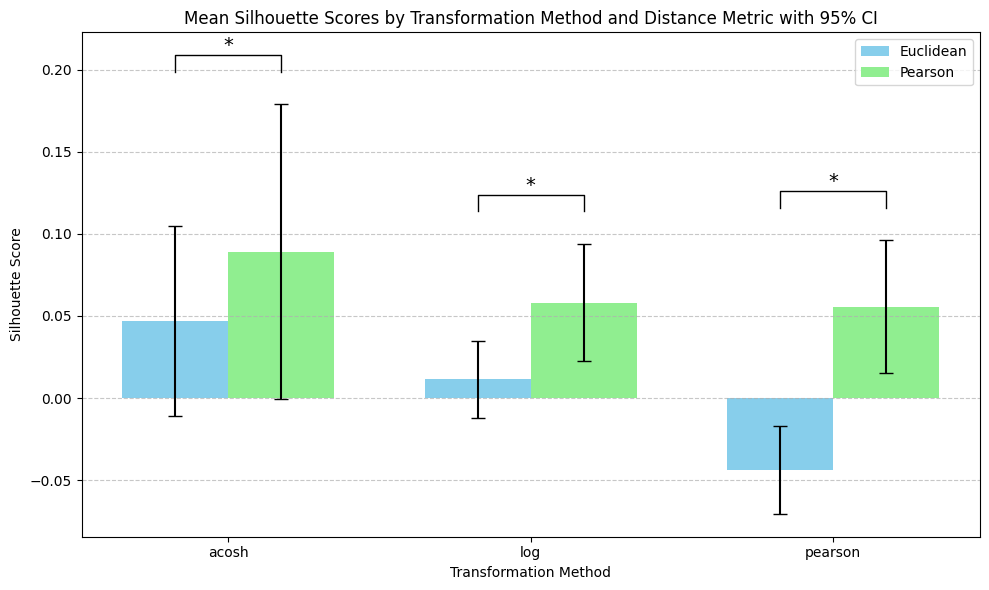

In [12]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection

# Load the silhouette_scores_transformed.csv and filter out rows with 'pearson' in 'transformation_method'
df = pd.read_csv('silhouette_scores_transformed.csv')
df_filtered = df[df['transformation_method'] != 'pearson']

# Define the directory containing other CSV files
directory = "/home/yenhsian/test/BanditPAM/results/transformation"

# Initialize a list to store dataframes
all_dfs = [df_filtered]  # Start with the filtered silhouette_scores_transformed.csv data

# Loop through the files in the directory and read each CSV file
for filename in os.listdir(directory):
    if filename.endswith(".csv") and filename != "silhouette_scores_transformed.csv":
        file_path = os.path.join(directory, filename)
        temp_df = pd.read_csv(file_path)
        all_dfs.append(temp_df)

# Concatenate all dataframes
df = pd.concat(all_dfs, ignore_index=True)

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(df, id_vars=['dataset_name', 'transformation_method'],
                    value_vars=['euclidean_sil_score', 'correlation_sil_score'],
                    var_name='Metric', value_name='Silhouette Score')

# Rename metric values for readability
df_melted['Metric'] = df_melted['Metric'].replace({
    'euclidean_sil_score': 'Euclidean',
    'correlation_sil_score': 'Pearson'
})

# Calculate mean and confidence intervals for each transformation and metric
grouped = df_melted.groupby(['transformation_method', 'Metric'])['Silhouette Score']
means = grouped.mean()
stds = grouped.std()
counts = grouped.count()
sems = stds / np.sqrt(counts)
confidence = 0.95
h = sems * stats.t.ppf((1 + confidence) / 2., counts - 1)

# Prepare DataFrame for plotting
stats_df = pd.DataFrame({
    'Mean': means,
    'SEM': sems,
    'CI': h,
    'Count': counts
}).reset_index()

# Perform paired t-tests between Euclidean and Pearson for each transformation method
p_values = []
for transformation in df['transformation_method'].unique():
    euclidean_scores = df[df['transformation_method'] == transformation]['euclidean_sil_score']
    correlation_scores = df[df['transformation_method'] == transformation]['correlation_sil_score']
    t_stat, p_value = ttest_rel(euclidean_scores, correlation_scores)
    p_values.append(p_value)

# Apply FDR correction for multiple comparisons
_, corrected_p_values = fdrcorrection(p_values, alpha=0.05)

# Prepare pivot table for plotting with error bars
pivot_df = stats_df.pivot(index='transformation_method', columns='Metric', values=['Mean', 'CI'])
transformation_methods = pivot_df.index
euclidean_means = pivot_df['Mean']['Euclidean'].values
euclidean_CIs = pivot_df['CI']['Euclidean'].values
pearson_means = pivot_df['Mean']['Pearson'].values
pearson_CIs = pivot_df['CI']['Pearson'].values

# Plotting
bar_width = 0.35
x = np.arange(len(transformation_methods))

plt.figure(figsize=(10, 6))

# Plot Euclidean bars
plt.bar(x - bar_width/2, euclidean_means, yerr=euclidean_CIs, 
        width=bar_width, label='Euclidean', capsize=5, color='skyblue')

# Plot Pearson bars
plt.bar(x + bar_width/2, pearson_means, yerr=pearson_CIs, 
        width=bar_width, label='Pearson', capsize=5, color='lightgreen')

# Set x-axis labels
plt.xticks(x, transformation_methods)

# Add labels and title
plt.xlabel('Transformation Method')
plt.ylabel('Silhouette Score')
plt.title('Mean Silhouette Scores by Transformation Method and Distance Metric with 95% CI')
plt.legend()

# Add significance annotations
for i, (transformation, corrected_p_value) in enumerate(zip(transformation_methods, corrected_p_values)):
    if corrected_p_value < 0.05:
        y = max(euclidean_means[i] + euclidean_CIs[i], pearson_means[i] + pearson_CIs[i]) + 0.02
        h = 0.01
        plt.plot([x[i] - bar_width/2, x[i] - bar_width/2, x[i] + bar_width/2, x[i] + bar_width/2], 
                 [y, y + h, y + h, y], lw=1.0, c='black')
        plt.text(x[i], y + h, '*', ha='center', va='bottom', color='black', fontsize=14)

# Add y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()